***

# Capítulo 11: Training Deep Neural Nets (Treinando Redes Neurais Profundas)

O Capítulo 11, intitulado **"Training Deep Neural Nets"**, detalha as técnicas e ferramentas essenciais para treinar redes neurais profundas de forma eficaz e combater problemas comuns, como o desvanecimento ou a explosão de gradientes e o overfitting.

## Principais Tópicos Abordados:

### 1. Problemas de Gradientes Desvanecentes/Explodindo
*   O algoritmo de *backpropagation* propaga o **gradiente do erro** da camada de saída para a camada de entrada.
*   **Gradientes desvanecentes (vanishing gradients)** ocorrem quando funções de ativação como a logística (sigmoid) **saturam** para entradas grandes, fazendo com que suas derivadas se aproximem de zero. Isso resulta em gradientes que se diluem nas camadas superiores, deixando pouco ou nenhum gradiente para as camadas inferiores.
*   **Gradientes explodindo (exploding gradients)** acontecem quando as atualizações de peso se tornam excessivamente grandes.

### 2. Inicialização Xavier e He
*   Essas estratégias de inicialização de pesos foram propostas para **mitigar os problemas de gradientes**, garantindo que o sinal e os gradientes fluam adequadamente em ambas as direções.
*   A **inicialização Xavier (ou Glorot)** é usada com a função de ativação logística.
*   A **inicialização He** é recomendada para a função de ativação ReLU e suas variantes.

### 3. Funções de Ativação Não Saturantes
*   A escolha da função de ativação é crucial para evitar a saturação.
*   **ReLU (Rectified Linear Unit)**: Rápida de computar e não satura para valores positivos, mas pode sofrer de "dying ReLUs" (neurônios inativos).
*   **Leaky ReLU**: Soluciona o problema de "dying ReLUs" ao permitir uma pequena inclinação para entradas negativas.
*   **ELU (Exponential Linear Unit)**: Geralmente superior às variantes da ReLU, com valores negativos para entradas menores que zero (ajudando a manter a média das ativações próxima de zero) e suavidade em todos os pontos, o que pode acelerar a descida do gradiente.

### 4. Normalização em Lotes (Batch Normalization - BN)
*   Técnica eficaz para resolver problemas de gradientes e o **"Internal Covariate Shift"** (onde a distribuição das entradas de uma camada muda durante o treinamento).
*   A BN **normaliza as entradas de cada camada**, acelera o treinamento e atua como um regularizador.
*   No TensorFlow, requer a definição de um *placeholder* `is_training` para `True` (treinamento) e `False` (avaliação).

### 5. Recorte de Gradiente (Gradient Clipping)
*   Limita os valores máximos dos gradientes durante o *backpropagation* para **mitigar gradientes explosivos**.

### 6. Reaproveitamento de Camadas Pré-Treinadas (Transfer Learning)
*   Estratégia poderosa para treinar DNNs, especialmente com poucos dados. Consiste em **reutilizar as camadas inferiores** de uma rede neural já treinada em uma tarefa similar.
*   **Congelamento de Camadas**: Impede a alteração dos pesos das camadas reutilizadas.
*   **Model Zoos**: Repositórios públicos de modelos pré-treinados.
*   **Pré-Treinamento Não Supervisionado**: Treina camadas individualmente com algoritmos como autoencoders ou RBMs usando dados não rotulados, antes do ajuste fino supervisionado.

### 7. Otimizadores Mais Rápidos
*   Otimizadores avançados aceleram significativamente o treinamento; o **Adam optimization** é geralmente o preferido.
*   **Otimização por Momentum**: Acelera a descida do gradiente.
*   **Nesterov Accelerated Gradient (NAG)**: Variação mais rápida do momentum.
*   **AdaGrad**: Reduz gradientes em dimensões mais íngremes, útil para dados esparsos.
*   **RMSProp**: Melhora o AdaGrad, acumulando gradientes mais recentes.
*   **Adam (Adaptive Moment Estimation)**: Combina Momentum e RMSProp.

### 8. Agendamento da Taxa de Aprendizagem (Learning Schedules)
*   Estratégias para **ajustar a taxa de aprendizagem** durante o treinamento para melhores resultados (ex: agendamento por potência, exponencial, constante por partes, por desempenho).

### 9. Técnicas de Regularização
*   Utilizadas para evitar o **overfitting** (sobreajuste).
*   **Early Stopping**: Interrompe o treinamento quando o erro de validação atinge um mínimo.
*   **Regularização ℓ1 e ℓ2**: Penalizam pesos grandes.
*   **Dropout**: Durante o treinamento, cada neurônio tem uma probabilidade `p` de ser "desativado", forçando os neurônios a serem mais independentes.
*   **Regularização Max-Norm**: Limita a norma dos pesos das conexões.
*   **Aumento de Dados (Data Augmentation)**: Gera novas instâncias de treinamento a partir das existentes.
*   **Conexões de Salto (Skip Connections)**: Conectam a entrada de uma camada à saída de uma camada mais alta, acelerando o treinamento de redes profundas (como as ResNets no Capítulo 13).

### 10. Diretrizes Práticas
*   O capítulo oferece uma **configuração padrão** que funciona bem na maioria dos casos: inicialização He, ELU, otimização Adam, *early stopping* e Batch Normalization.
*   Apesar de o treinamento de DNNs poder levar muito tempo, essas técnicas são fundamentais para o Deep Learning.

***

### *Implementação*

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Dense, BatchNormalization
from functools import partial
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Activation

In [22]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

mnist_train_images = mnist_train_images.reshape(-1, 28*28).astype("float32") / 255.0
mnist_test_images = mnist_test_images.reshape(-1, 28*28).astype("float32") / 255.0

In [6]:
he_init = tf.keras.initializers.HeNormal()
hidden1 = tf.keras.layers.Dense(100, activation=tf.nn.relu,
                                kernel_initializer=he_init, name="hidden_1")

In [7]:
hidden1 = tf.keras.layers.Dense(100, activation=tf.nn.leaky_relu,
                                kernel_initializer=he_init, name="hidden_1")

### Implementando a normalização em lote com o tensorflow

In [ ]:

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

model = Sequential([
    Dense(n_hidden1, kernel_initializer="he_normal", input_shape=(n_inputs,)),
    BatchNormalization(),
    Activation("elu"),
    Dense(n_hidden2, kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation("elu"),
    Dense(n_outputs, kernel_initializer="he_normal"),
    BatchNormalization()
])

model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

history = model.fit(
    mnist_train_images, mnist_train_labels,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(mnist_test_images, mnist_test_labels)
)

model.save("./my_model_final.h5")

Epoch 1/10


c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9203 - loss: 0.4561 - val_accuracy: 0.9632 - val_loss: 0.2035
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9600 - loss: 0.2061 - val_accuracy: 0.9746 - val_loss: 0.1275
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9714 - loss: 0.1390 - val_accuracy: 0.9732 - val_loss: 0.1109
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9746 - loss: 0.1089 - val_accuracy: 0.9771 - val_loss: 0.0870
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9800 - loss: 0.0846 - val_accuracy: 0.9793 - val_loss: 0.0742
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9824 - loss: 0.0723 - val_accuracy: 0.9771 - val_loss: 0.0797
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9844 - loss: 0.0611 - val_accuracy: 0.9801 - val_loss: 0.0705
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0515 - val_accuracy: 0.9805 - val_

### Exercícios:

1. É correto inicializarmos todos os pesos no mesmo valor desde que esse valor seja selecionado aleatoriamente usando a inicialização He?

Não, não é correto inicializar todos os pesos no mesmo valor, mesmo que esse valor seja selecionado aleatoriamente usando a inicialização He. Isso ocorre porque, ao inicializar todos os pesos com o mesmo valor, todas as unidades em uma camada receberão os mesmos gradientes durante o treinamento, resultando em atualizações idênticas. Isso impede que as unidades aprendam representações diferentes, tornando a rede neural ineficaz. A inicialização He é projetada para atribuir valores diferentes a cada peso, garantindo que os gradientes fluam adequadamente e que as unidades aprendam de forma independente.

2. É correto inicializarmos os termos de polarização em 0?

Sim, é correto inicializar os termos de polarização (biases) em 0. Isso ocorre porque os termos de polarização não afetam o fluxo de gradientes na rede, ao contrário dos pesos. Inicializar os biases em 0 é uma prática comum e não causa problemas como a simetria entre os neurônios, que pode ocorrer ao inicializar os pesos com valores iguais.


3. Nomeie três vantagens da função de ativação ELU em relação à ReLU

- **Valores negativos suaves**: A ELU permite valores negativos suaves, o que ajuda a manter a média das ativações próxima de zero, acelerando o treinamento e reduzindo o risco de desvanecimento de gradientes.
- **Continuidade e derivada suave**: A ELU é contínua e possui uma derivada suave em todos os pontos, o que pode levar a uma convergência mais estável durante o treinamento.
- **Menor risco de "neurônios mortos"**: Diferentemente da ReLU, a ELU não sofre do problema de "neurônios mortos", pois produz valores negativos para entradas menores que zero, permitindo que os gradientes fluam mesmo para essas entradas.

4. Em quais casos você utilizaria cada uma das seguintes funções de ativação: ELU, leaky ReLU (e suas variantes), ReLU tanh, logistic e softmax?

- **ELU**: Usada quando se deseja acelerar o treinamento e reduzir o risco de desvanecimento de gradientes, especialmente em redes profundas. É útil para manter a média das ativações próxima de zero.
- **Leaky ReLU (e variantes)**: Utilizada para evitar o problema de "neurônios mortos", especialmente em redes onde a ReLU padrão pode levar a gradientes nulos para entradas negativas.
- **ReLU**: Escolha padrão para redes neurais profundas devido à sua simplicidade e eficiência computacional. Funciona bem em muitos casos, exceto quando há risco de "neurônios mortos".
- **tanh**: Usada quando se deseja que as ativações sejam centradas em torno de zero, o que pode ajudar na convergência em algumas arquiteturas.
- **logistic**: Utilizada em saídas de redes neurais para problemas de classificação binária.
- **softmax**: Usada na camada de saída para problemas de classificação multiclasse, pois converte os logits em probabilidades.

5. O que pode acontecer se voce ajustar o hiperparâmetro momentum muito próximo de 1 (por exemplo, 0.9999) quando utilizar um MomentumOptimizer?

Se o hiperparâmetro momentum for ajustado muito próximo de 1 (por exemplo, 0.9999) ao usar um MomentumOptimizer, o otimizador pode acumular gradientes antigos por um longo período de tempo. Isso pode levar a oscilações excessivas durante o treinamento, dificultando a convergência do modelo. Embora um valor alto de momentum possa acelerar o treinamento em algumas situações, é importante encontrar um equilíbrio para evitar instabilidades.


6. Nomeie três maneiras de produzir um modelo esparso

- **Regularização ℓ1**: Adiciona uma penalidade proporcional à soma dos valores absolutos dos pesos, incentivando pesos menores e esparsidade.
- **Dropout**: Durante o treinamento, desativa aleatoriamente uma fração dos neurônios, o que pode levar a uma rede mais esparsa.
- **Podar pesos pequenos**: Após o treinamento, remove explicitamente os pesos com valores absolutos abaixo de um determinado limiar, tornando o modelo mais esparso.


7. O dropout retarda o treinamento? Isso retarda a inferência (ou seja, fazer previsões em novas instâncias)?

Sim, o dropout retarda o treinamento, pois durante cada iteração ele desativa aleatoriamente uma fração dos neurônios, o que aumenta o tempo de computação. No entanto, ele não retarda a inferência, pois durante a fase de inferência (previsões em novas instâncias), o dropout não é aplicado. Em vez disso, os pesos são escalados para refletir a média das ativações durante o treinamento.


8. Aprendizado Profundo.

- Crie uma DNN com cinco camadas ocultas de 100 neurônios cada, inicialização He e a função de ativação ELU.
- Utilizando a otimização de Adam e a parada antecipada, tente treiná-lo no MNIST, mas apenas nos dígitos de 0 a 4, pois utilizaremos o aprendizado de transferência para os dígitos 5 a 9 no próximo exercício. Você precisará de uma camada de saída softmax com 5 neurônios e, como sempre, assegure-se de salvar os pontos de verificação em intervalos regulares e salvar o modelo final para que você possa reutiliza-lo mais tarde.
- Ajuste os hiperparâmetros utilizando a validação cruzada e veja que nível de precisão você consegue atingir.
- Agora tente adicionar a Normalização de Lote e compare as curvas de aprendizado: ela está convergindo mais rápido que antes? Ela produz um modelo melhor?
- O modelo está se sobreajustando ao conjunto de treinamento? Tente adicionar dropout a cada camada e tente novamente. Isso ajuda? 

=== CARREGANDO DADOS MNIST (0-4) ===
Dados carregados: 35735 amostras, 784 features
Distribuição das classes: [6903 7877 6990 7141 6824]

=== AJUSTE DE HIPERPARÂMETROS ===

Testando: LR=0.001, Dropout=0.0, BatchNorm=False
Epoch 1/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9633 - loss: 0.1149 - val_accuracy: 0.9806 - val_loss: 0.0617 - learning_rate: 0.0010
Epoch 2/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.0530 - val_accuracy: 0.9865 - val_loss: 0.0439 - learning_rate: 0.0010
Epoch 3/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9846 - val_loss: 0.0515 - learning_rate: 0.0010
Epoch 4/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0316 - val_accuracy: 0.9839 - val_loss: 0.0508 - learning_rate: 0.0010
Epoch 5/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9864 - val_loss: 0.0473 - learning_rate: 0.0010
Epoch 6/100
7

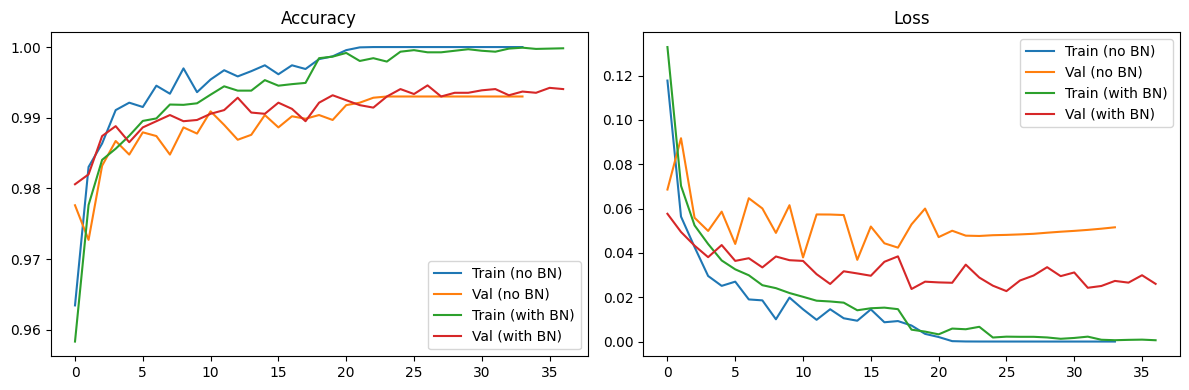

Acurácia sem BN: 0.9926
Acurácia com BN: 0.9957

=== ANALISANDO OVERFITTING E DROPOUT ===
Treinando sem dropout...
Epoch 1/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9573 - loss: 0.1370 - val_accuracy: 0.9792 - val_loss: 0.0609 - learning_rate: 0.0010
Epoch 2/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9789 - loss: 0.0665 - val_accuracy: 0.9843 - val_loss: 0.0426 - learning_rate: 0.0010
Epoch 3/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0500 - val_accuracy: 0.9876 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 4/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9850 - loss: 0.0437 - val_accuracy: 0.9843 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 5/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9877 - loss: 0.0366 - val_accuracy: 0.9853 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 6/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9877 - loss: 0.0354 - val_accuracy: 0.9881 - val_loss

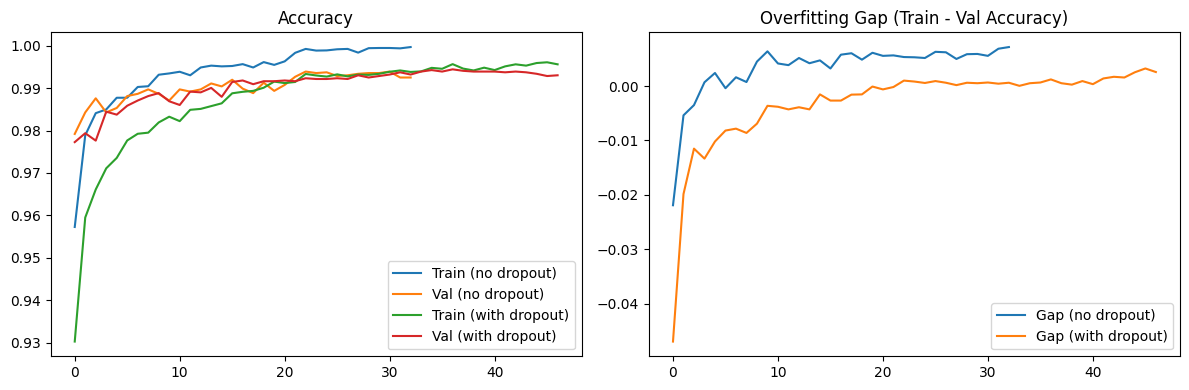

Acurácia sem dropout: 0.9940
Acurácia com dropout: 0.9937

=== TREINANDO MODELO FINAL ===
Epoch 1/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9560 - loss: 0.1400 - val_accuracy: 0.9773 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 2/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9788 - loss: 0.0692 - val_accuracy: 0.9857 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 3/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9862 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 4/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9859 - loss: 0.0431 - val_accuracy: 0.9860 - val_loss: 0.0479 - learning_rate: 0.0010
Epoch 5/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9868 - loss: 0.0391 - val_accuracy: 0.9867 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 6/100
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0340 - val_accuracy: 0.9893 - val_loss: 0.0358 - learning_rate:

In [3]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# 1. Carregar e preparar os dados (apenas dígitos 0-4)
def load_mnist_0_to_4():
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target.astype(np.int8)
    
    # Filtrar apenas dígitos 0-4
    mask = y <= 4
    X_filtered, y_filtered = X[mask], y[mask]
    
    # Normalizar
    X_filtered = X_filtered / 255.0
    
    return X_filtered, y_filtered

# 2. Criar o modelo DNN
def create_dnn_model(batch_norm=False, dropout_rate=0.0):
    model = tf.keras.Sequential()
    
    # Camada de entrada
    model.add(tf.keras.layers.Input(shape=(784,)))
    
    # 5 camadas ocultas com 100 neurônios cada
    for i in range(5):
        model.add(tf.keras.layers.Dense(
            100, 
            kernel_initializer='he_normal',
            name=f'hidden_{i+1}'
        ))
        
        if batch_norm:
            model.add(tf.keras.layers.BatchNormalization(name=f'bn_{i+1}'))
        
        model.add(tf.keras.layers.ELU(name=f'elu_{i+1}'))
        
        if dropout_rate > 0:
            model.add(tf.keras.layers.Dropout(dropout_rate, name=f'dropout_{i+1}'))
    
    # Camada de saída
    model.add(tf.keras.layers.Dense(
        5, 
        activation='softmax',
        kernel_initializer='he_normal',
        name='outputs'
    ))
    
    return model

# 3. Função para treinar e avaliar o modelo
def train_and_evaluate_model(batch_norm=False, dropout_rate=0.0, learning_rate=0.001):
    # Carregar dados
    X, y = load_mnist_0_to_4()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
    
    # Criar modelo
    model = create_dnn_model(batch_norm=batch_norm, dropout_rate=dropout_rate)
    
    # Compilar modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            patience=10,
            restore_best_weights=True,
            monitor='val_accuracy'
        ),
        tf.keras.callbacks.ModelCheckpoint(
            'best_model.keras',
            save_best_only=True,
            monitor='val_accuracy'
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            factor=0.5,
            patience=5
        )
    ]
    
    # Treinar modelo
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )
    
    # Avaliar no teste
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    return model, history, test_acc

# 4. Ajuste de hiperparâmetros com validação cruzada
def hyperparameter_tuning():
    learning_rates = [0.001, 0.0005, 0.0001]
    dropout_rates = [0.0, 0.2, 0.4]
    batch_norm_options = [False, True]
    
    best_acc = 0
    best_params = {}
    
    for lr in learning_rates:
        for dropout in dropout_rates:
            for bn in batch_norm_options:
                print(f"\nTestando: LR={lr}, Dropout={dropout}, BatchNorm={bn}")
                
                model, history, test_acc = train_and_evaluate_model(
                    batch_norm=bn,
                    dropout_rate=dropout,
                    learning_rate=lr
                )
                
                print(f"Acurácia no teste: {test_acc:.4f}")
                
                if test_acc > best_acc:
                    best_acc = test_acc
                    best_params = {
                        'learning_rate': lr,
                        'dropout_rate': dropout,
                        'batch_norm': bn,
                        'accuracy': test_acc
                    }
    
    print(f"\nMelhores parâmetros: {best_params}")
    return best_params

# 5. Comparar curvas de aprendizado
def compare_learning_curves():
    # Sem BatchNorm
    print("Treinando sem Batch Normalization...")
    model_no_bn, history_no_bn, acc_no_bn = train_and_evaluate_model(
        batch_norm=False, dropout_rate=0.0
    )
    
    # Com BatchNorm
    print("Treinando com Batch Normalization...")
    model_bn, history_bn, acc_bn = train_and_evaluate_model(
        batch_norm=True, dropout_rate=0.0
    )
    
    # Plotar curvas de aprendizado
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history_no_bn.history['accuracy'], label='Train (no BN)')
    plt.plot(history_no_bn.history['val_accuracy'], label='Val (no BN)')
    plt.plot(history_bn.history['accuracy'], label='Train (with BN)')
    plt.plot(history_bn.history['val_accuracy'], label='Val (with BN)')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history_no_bn.history['loss'], label='Train (no BN)')
    plt.plot(history_no_bn.history['val_loss'], label='Val (no BN)')
    plt.plot(history_bn.history['loss'], label='Train (with BN)')
    plt.plot(history_bn.history['val_loss'], label='Val (with BN)')
    plt.title('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('learning_curves_comparison.png')
    plt.show()
    
    print(f"Acurácia sem BN: {acc_no_bn:.4f}")
    print(f"Acurácia com BN: {acc_bn:.4f}")

# 6. Analisar overfitting e testar dropout
def analyze_overfitting():
    # Sem dropout
    print("Treinando sem dropout...")
    model_no_dropout, history_no_dropout, acc_no_dropout = train_and_evaluate_model(
        batch_norm=True, dropout_rate=0.0
    )
    
    # Com dropout
    print("Treinando com dropout (0.2)...")
    model_dropout, history_dropout, acc_dropout = train_and_evaluate_model(
        batch_norm=True, dropout_rate=0.2
    )
    
    # Plotar comparação
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history_no_dropout.history['accuracy'], label='Train (no dropout)')
    plt.plot(history_no_dropout.history['val_accuracy'], label='Val (no dropout)')
    plt.plot(history_dropout.history['accuracy'], label='Train (with dropout)')
    plt.plot(history_dropout.history['val_accuracy'], label='Val (with dropout)')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    gap_no_dropout = np.array(history_no_dropout.history['accuracy']) - np.array(history_no_dropout.history['val_accuracy'])
    gap_dropout = np.array(history_dropout.history['accuracy']) - np.array(history_dropout.history['val_accuracy'])
    plt.plot(gap_no_dropout, label='Gap (no dropout)')
    plt.plot(gap_dropout, label='Gap (with dropout)')
    plt.title('Overfitting Gap (Train - Val Accuracy)')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('overfitting_analysis.png')
    plt.show()
    
    print(f"Acurácia sem dropout: {acc_no_dropout:.4f}")
    print(f"Acurácia com dropout: {acc_dropout:.4f}")

# 7. Executar o pipeline completo
def main():
    print("=== CARREGANDO DADOS MNIST (0-4) ===")
    X, y = load_mnist_0_to_4()
    print(f"Dados carregados: {X.shape[0]} amostras, {X.shape[1]} features")
    print(f"Distribuição das classes: {np.bincount(y)}")
    
    print("\n=== AJUSTE DE HIPERPARÂMETROS ===")
    best_params = hyperparameter_tuning()
    
    print("\n=== COMPARANDO BATCH NORMALIZATION ===")
    compare_learning_curves()
    
    print("\n=== ANALISANDO OVERFITTING E DROPOUT ===")
    analyze_overfitting()
    
    print("\n=== TREINANDO MODELO FINAL ===")
    # Usar melhores parâmetros encontrados
    final_model, final_history, final_acc = train_and_evaluate_model(
        batch_norm=best_params['batch_norm'],
        dropout_rate=best_params['dropout_rate'],
        learning_rate=best_params['learning_rate']
    )
    
    print(f"Acurácia final no teste: {final_acc:.4f}")
    
    # Salvar modelo final
    final_model.save('mnist_0_to_4_final_model.keras')
    print("Modelo final salvo como 'mnist_0_to_4_final_model.keras'")

if __name__ == "__main__":
    main()


9. Aprendizado de transferência

-A: Crie uma nova DNN que reutilize todas as camadas ocultas pré-treinadas do modelo anterior, congele e substitua a camada de saída softmax por uma nova.

-B: Treine esta nova DNN nos dígitos 5 e 9 utilizando apenas 100 imagens por dígito e cronometre quanto tempo leva. Apesar do pequeno número de exemplos, você consegue atingir uma alta precisão?

-C: Tente pegar as camadas congeladas e treine o modelo novamente: Quão mais rápido ele está agora?

-D: Tente novamente reutilizando apenas quatro camadas ocultas em vez de cinco. Você consegue atingir uma precisão mais alta?

-E: Agosra, descongele as duas camadas ocultas mais altas e continue treinando. Você consegue fazer com que o modelo tenha um desempenho ainda melhor?

=== TRANSFER LEARNING - DÍGITOS 5-9 ===
✅ Modelo pré-treinado carregado com sucesso!
📊 Dados de transferência: 500 amostras
📊 Distribuição: [100 100 100 100 100]

B: 5 CAMADAS CONGELADAS (100 imagens/classe)
Camadas treináveis: 2
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1175 - loss: 1.9705 - val_accuracy: 0.1000 - val_loss: 1.8432 - learning_rate: 1.0000e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1400 - loss: 1.9049 - val_accuracy: 0.1400 - val_loss: 1.7809 - learning_rate: 1.0000e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1600 - loss: 1.8419 - val_accuracy: 0.1800 - val_loss: 1.7217 - learning_rate: 1.0000e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1925 - loss: 1.7824 - val_accuracy: 0.2200 - val_loss: 1.6648 - learning_rate: 1.0000e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2200 - loss: 1.7250 - val_accuracy: 0.2400 - val_loss: 1.6113 - learning_rate: 1.0000e-04

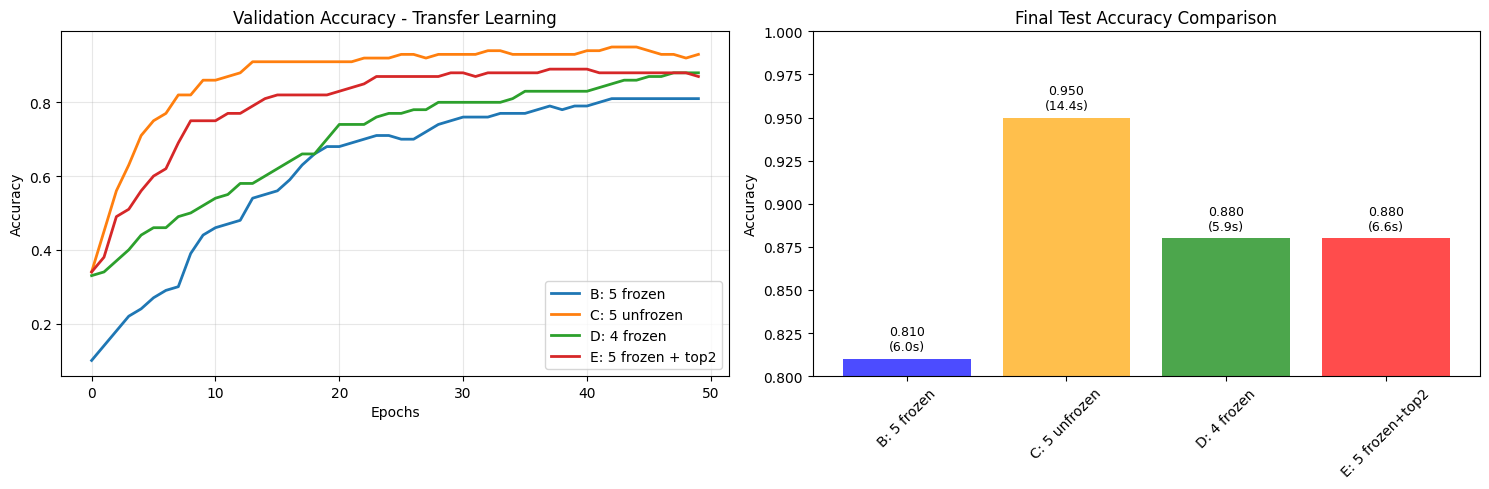


🎯 Transfer learning completo! Verifique o gráfico salvo: 'transfer_learning_results.png'


In [5]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import time
import matplotlib.pyplot as plt

# 1. Carregar dados MNIST (apenas dígitos 5-9)
def load_mnist_5_to_9(samples_per_class=100):
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target.astype(np.int8)
    
    # Filtrar apenas dígitos 5-9
    mask = (y >= 5) & (y <= 9)
    X_filtered, y_filtered = X[mask], y[mask]
    
    # Normalizar
    X_filtered = X_filtered / 255.0
    
    # Mapear labels 5-9 para 0-4
    y_filtered = y_filtered - 5
    
    # Amostrar apenas 100 imagens por classe
    sampled_indices = []
    for class_label in range(5):
        class_indices = np.where(y_filtered == class_label)[0]
        sampled_indices.extend(np.random.choice(class_indices, samples_per_class, replace=False))
    
    X_sampled = X_filtered[sampled_indices]
    y_sampled = y_filtered[sampled_indices]
    
    return X_sampled, y_sampled

# 2. A: Criar nova DNN reutilizando camadas pré-treinadas
def create_transfer_model(reuse_layers=5, freeze_layers=True):
    # Carregar modelo pré-treinado
    base_model = tf.keras.models.load_model('mnist_0_to_4_final_model.keras')
    
    # Congelar camadas pré-treinadas
    if freeze_layers:
        for layer in base_model.layers[:-1]:  # Exceto a última camada
            layer.trainable = False
    
    # Criar novo modelo reutilizando camadas ocultas
    inputs = tf.keras.Input(shape=(784,))
    
    # Reutilizar camadas pré-treinadas
    x = inputs
    for i, layer in enumerate(base_model.layers[:-1]):  # Exceto output layer
        if i < reuse_layers * 3:  # Cada camada tem Dense + BN + ELU (3 layers por camada oculta)
            x = layer(x)
        else:
            break
    
    # Nova camada de saída para 5 classes (5-9)
    outputs = tf.keras.layers.Dense(5, activation='softmax', 
                                   kernel_initializer='he_normal',
                                   name='new_outputs')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# 3. B: Treinar nova DNN com poucos dados e cronometrar
def train_transfer_model(reuse_layers=5, freeze_layers=True, unfreeze_top_layers=0):
    # Carregar dados
    X, y = load_mnist_5_to_9(samples_per_class=100)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Criar modelo de transferência
    model = create_transfer_model(reuse_layers, freeze_layers)
    
    # Se especificado, descongelar camadas superiores
    if unfreeze_top_layers > 0:
        # Encontrar índices das camadas treináveis
        trainable_layers = [i for i, layer in enumerate(model.layers) 
                           if hasattr(layer, 'trainable') and layer.trainable]
        if trainable_layers:
            start_idx = trainable_layers[0]
            for i in range(start_idx, start_idx + unfreeze_top_layers * 3):
                if i < len(model.layers):
                    model.layers[i].trainable = True
    
    # Compilar modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print(f"Camadas treináveis: {sum([l.trainable for l in model.layers if hasattr(l, 'trainable')])}")
    
    # Treinar e cronometrar
    start_time = time.time()
    
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=16,
        validation_data=(X_test, y_test),
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
        ],
        verbose=1
    )
    
    training_time = time.time() - start_time
    
    # Avaliar
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    return model, history, test_acc, training_time

# 4. Executar todos os cenários
print("=== TRANSFER LEARNING - DÍGITOS 5-9 ===")

# Verificar se modelo pré-treinado existe
try:
    base_model = tf.keras.models.load_model('mnist_0_to_4_final_model.keras')
    print("✅ Modelo pré-treinado carregado com sucesso!")
except:
    print("❌ Modelo pré-treinado não encontrado!")
    exit()

# Carregar dados de transferência
X_transfer, y_transfer = load_mnist_5_to_9(samples_per_class=100)
print(f"📊 Dados de transferência: {X_transfer.shape[0]} amostras")
print(f"📊 Distribuição: {np.bincount(y_transfer)}")

# B: Treinar com 5 camadas congeladas
print("\n" + "="*50)
print("B: 5 CAMADAS CONGELADAS (100 imagens/classe)")
print("="*50)
model_b, history_b, acc_b, time_b = train_transfer_model(
    reuse_layers=5, freeze_layers=True, unfreeze_top_layers=0
)
print(f"✅ Acurácia: {acc_b:.4f}")
print(f"⏰ Tempo: {time_b:.1f}s")

# C: Treinar com camadas descongeladas (mais rápido?)
print("\n" + "="*50)
print("C: 5 CAMADAS DESCONGELADAS (comparação de velocidade)")
print("="*50)
model_c, history_c, acc_c, time_c = train_transfer_model(
    reuse_layers=5, freeze_layers=False, unfreeze_top_layers=0
)
print(f"✅ Acurácia: {acc_c:.4f}")
print(f"⏰ Tempo: {time_c:.1f}s")
print(f"⚡ Diferença de velocidade: {time_c/time_b:.2f}x")

# D: Reutilizar apenas 4 camadas
print("\n" + "="*50)
print("D: 4 CAMADAS CONGELADAS")
print("="*50)
model_d, history_d, acc_d, time_d = train_transfer_model(
    reuse_layers=4, freeze_layers=True, unfreeze_top_layers=0
)
print(f"✅ Acurácia: {acc_d:.4f}")
print(f"⏰ Tempo: {time_d:.1f}s")

# E: Descongelar 2 camadas superiores
print("\n" + "="*50)
print("E: 5 CAMADAS CONGELADAS + DESCONGELAR TOP 2")
print("="*50)
model_e, history_e, acc_e, time_e = train_transfer_model(
    reuse_layers=5, freeze_layers=True, unfreeze_top_layers=2
)
print(f"✅ Acurácia: {acc_e:.4f}")
print(f"⏰ Tempo: {time_e:.1f}s")

# Resultados finais
print("\n" + "="*60)
print("RESULTADOS FINAIS - TRANSFER LEARNING")
print("="*60)
print(f"B - 5 camadas congeladas:     {acc_b:.4f} ({time_b:.1f}s)")
print(f"C - 5 camadas descongeladas:  {acc_c:.4f} ({time_c:.1f}s)")
print(f"D - 4 camadas congeladas:     {acc_d:.4f} ({time_d:.1f}s)")
print(f"E - 5 congeladas + top 2:     {acc_e:.4f} ({time_e:.1f}s)")

# Salvar melhor modelo
best_acc = max(acc_b, acc_c, acc_d, acc_e)
if best_acc == acc_e:
    model_e.save('mnist_5_to_9_best_model.keras')
    print("✅ Melhor modelo salvo: E - 5 congeladas + top 2 descongeladas")
elif best_acc == acc_b:
    model_b.save('mnist_5_to_9_best_model.keras')
    print("✅ Melhor modelo salvo: B - 5 camadas congeladas")

# Plotar resultados
plt.figure(figsize=(15, 5))

# Curvas de aprendizado
plt.subplot(1, 2, 1)
plt.plot(history_b.history['val_accuracy'], label='B: 5 frozen', linewidth=2)
plt.plot(history_c.history['val_accuracy'], label='C: 5 unfrozen', linewidth=2)
plt.plot(history_d.history['val_accuracy'], label='D: 4 frozen', linewidth=2)
plt.plot(history_e.history['val_accuracy'], label='E: 5 frozen + top2', linewidth=2)
plt.title('Validation Accuracy - Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparação de acurácia final
plt.subplot(1, 2, 2)
scenarios = ['B: 5 frozen', 'C: 5 unfrozen', 'D: 4 frozen', 'E: 5 frozen+top2']
accuracies = [acc_b, acc_c, acc_d, acc_e]
times = [time_b, time_c, time_d, time_e]

bars = plt.bar(scenarios, accuracies, alpha=0.7, color=['blue', 'orange', 'green', 'red'])
plt.title('Final Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

# Adicionar valores nas barras
for i, (acc, t) in enumerate(zip(accuracies, times)):
    plt.text(i, acc + 0.005, f'{acc:.3f}\n({t:.1f}s)', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('transfer_learning_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎯 Transfer learning completo! Verifique o gráfico salvo: 'transfer_learning_results.png'")

10. Pré treinamento em uma tarefa auxiliar.

*A*. Neste exercício, você construirá uma DNN que compara duas imagens de digitos MNIST e prevê se elas representam o mesmo dígito ou não. Então você reutilizará as camadas inferiores desta rede para treinar um classificador MNIST que utiliza poucos dados de treinamento. Comece construindo duas DNNs (vamos chama-las DNN A e B), ambas similares à que você construiu anteriormente, mas sem a camada de saída: cada DNN deve ter cinco camadas ocultas de 100 neurônios cada, inicialização He e ativação ELU. A seguir, adicione mais uma camada oculta com 10 unidades no topo de ambas as DNNs. Para fazer isso, você deve utilizar a função concat() do TensorFlow com axis=1 para concatenar as saídas de ambas as DNNs para cada instância e alimentar o resultado para a camada oculta. Finalmente, adicione uma camada de saída com um único neurônio usando a função de ativação logistica.

*B*. Divida o conjunto de treinamento MNIST em dois: o conjunto 1º deve conter 55 mil imagens, e o conjunto 2º deve conter 5 mil imagens. Crie uma função que gere um lote de treinamento em que cada instância é um par de imaghens MNIST escolhidas a partir do conjunto 1º. A metade das instâncias de treinamento deve ter pares de imagens que pertencem à mesma classe, enquanto a outra metade deve conter imagens de diferentes classes. Para cada par, se as imagens forem da mesma classe, o label de treinamento deve ser 0, ou 1, se forem de classes diferentes.

*C*. Treine a DNN neste conjunto de treinamento. Para cada par de imagens, você alimenta simultaneamente a primeira imagem da DNN A e a segunda imagem na DNN B. Toda rede aprenderá gradualmente se duas imagens pertencem a mesma classe ou não.

*D*. Agora Crie uma nova DNN reutilizando e congelando as camadas ocultas da DNN A e adicione uma camada de saída softmax com 10 neurônios no topo. Treine esta rede no conjunto 2º e veja se pode alcançar um alto desempenho apesar de ter apenas 500 imagens por classe.

=== PRÉ-TREINAMENTO EM TAREFA AUXILIAR ===
A: Construindo DNNs siamesas...
Conjunto pré-treinamento: 55000 imagens
Conjunto fine-tuning: 5000 imagens
Conjunto teste: 10000 imagens
Treinando DNN siamesa...
Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9127 - loss: 0.2270 - val_accuracy: 0.9340 - val_loss: 0.1607
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9410 - loss: 0.1496 - val_accuracy: 0.9570 - val_loss: 0.1296
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9512 - loss: 0.1290 - val_accuracy: 0.9620 - val_loss: 0.1116
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9595 - loss: 0.1114 - val_accuracy: 0.9630 - val_loss: 0.1022
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9652 - loss: 0.0987 - val_accuracy: 0.9610 - val_loss: 0.1109
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9690 - loss: 0.0899 - val_accuracy: 0.9710 - val_loss: 0.0831
Epoch 7/10
859/859 ━━━━━━━━

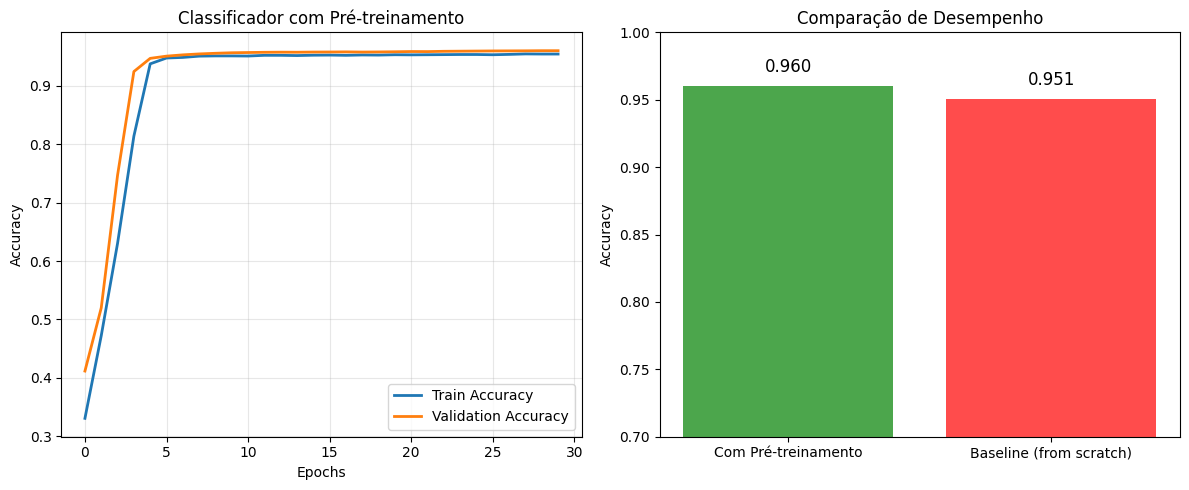


🎯 Resultado final: Acurácia de 0.9603 com apenas 500 imagens por classe!
✅ Pré-treinamento em tarefa auxiliar completo!


In [3]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from functools import partial

# 1. Carregar e preparar dados MNIST
def load_mnist_data():
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target.astype(np.int8)
    X = X / 255.0
    return X, y

# 2. A: Construir as DNNs gêmeas para comparação
def create_siamese_dnn():
    # Função para criar uma DNN individual (sem camada de saída)
    def create_base_dnn(name):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(100, kernel_initializer='he_normal', name=f'{name}_hidden1'),
            tf.keras.layers.BatchNormalization(name=f'{name}_bn1'),
            tf.keras.layers.ELU(name=f'{name}_elu1'),
            
            tf.keras.layers.Dense(100, kernel_initializer='he_normal', name=f'{name}_hidden2'),
            tf.keras.layers.BatchNormalization(name=f'{name}_bn2'),
            tf.keras.layers.ELU(name=f'{name}_elu2'),
            
            tf.keras.layers.Dense(100, kernel_initializer='he_normal', name=f'{name}_hidden3'),
            tf.keras.layers.BatchNormalization(name=f'{name}_bn3'),
            tf.keras.layers.ELU(name=f'{name}_elu3'),
            
            tf.keras.layers.Dense(100, kernel_initializer='he_normal', name=f'{name}_hidden4'),
            tf.keras.layers.BatchNormalization(name=f'{name}_bn4'),
            tf.keras.layers.ELU(name=f'{name}_elu4'),
            
            tf.keras.layers.Dense(100, kernel_initializer='he_normal', name=f'{name}_hidden5'),
            tf.keras.layers.BatchNormalization(name=f'{name}_bn5'),
            tf.keras.layers.ELU(name=f'{name}_elu5'),
        ], name=name)
        return model

    # Criar as duas DNNs gêmeas
    dnn_a = create_base_dnn('DNN_A')
    dnn_b = create_base_dnn('DNN_B')

    # Camadas de entrada para as duas imagens
    input_a = tf.keras.Input(shape=(784,), name='input_a')
    input_b = tf.keras.Input(shape=(784,), name='input_b')

    # Processar ambas as imagens
    processed_a = dnn_a(input_a)
    processed_b = dnn_b(input_b)

    # Concatenar as saídas
    concatenated = tf.keras.layers.concatenate([processed_a, processed_b], axis=1, name='concatenate')

    # Camada oculta adicional
    hidden = tf.keras.layers.Dense(10, activation='elu', kernel_initializer='he_normal', name='top_hidden')(concatenated)

    # Camada de saída
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(hidden)

    # Modelo completo
    model = tf.keras.Model(inputs=[input_a, input_b], outputs=output, name='siamese_dnn')
    
    return model, dnn_a

# 3. B: Função para gerar batches de pares de imagens (CORRIGIDA)
def generate_siamese_batch(X, y, batch_size=32):
    while True:
        # Selecionar índices aleatórios
        indices = np.random.choice(len(X), batch_size * 2, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        
        # Dividir em dois grupos
        X1 = X_batch[:batch_size]
        y1 = y_batch[:batch_size]
        X2 = X_batch[batch_size:]
        y2 = y_batch[batch_size:]
        
        # Criar labels: 0 se mesma classe, 1 se classes diferentes
        labels = (y1 != y2).astype(np.float32)
        
        # CORREÇÃO: Retornar tupla com dois inputs separados, não lista
        yield (X1, X2), labels

# 4. C: Treinar a DNN siamesa (CORRIGIDO)
def train_siamese_dnn():
    X, y = load_mnist_data()
    
    # Dividir o conjunto de treinamento
    X_train_main, X_train_ft, y_train_main, y_train_ft = train_test_split(
        X[:60000], y[:60000], test_size=5000, random_state=42, stratify=y[:60000]
    )
    
    X_test, y_test = X[60000:], y[60000:]
    
    print(f"Conjunto pré-treinamento: {X_train_main.shape[0]} imagens")
    print(f"Conjunto fine-tuning: {X_train_ft.shape[0]} imagens")
    print(f"Conjunto teste: {X_test.shape[0]} imagens")
    
    # Criar modelo siamesa
    siamese_model, dnn_a = create_siamese_dnn()
    
    # Compilar modelo
    siamese_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # CORREÇÃO: Criar dataset TensorFlow corretamente
    batch_size = 64
    steps_per_epoch = len(X_train_main) // batch_size
    
    # Criar dataset a partir do gerador
    def data_generator():
        return generate_siamese_batch(X_train_main, y_train_main, batch_size)
    
    # Definir assinaturas de output corretamente
    output_signature = (
        (
            tf.TensorSpec(shape=(None, 784), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 784), dtype=tf.float32)
        ),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
    
    dataset = tf.data.Dataset.from_generator(
        data_generator,
        output_signature=output_signature
    )
    
    # Dados de validação
    X_val1 = X_test[:1000]
    X_val2 = X_test[1000:2000]
    y_val = (y_test[:1000] != y_test[1000:2000]).astype(np.float32)
    
    # Treinar
    print("Treinando DNN siamesa...")
    
    history = siamese_model.fit(
        dataset,
        steps_per_epoch=steps_per_epoch,
        epochs=10,  # Reduzido para demonstração
        validation_data=((X_val1, X_val2), y_val),
        verbose=1
    )
    
    # Salvar modelo siamesa
    siamese_model.save('siamese_dnn_model.keras')
    
    return siamese_model, dnn_a, X_train_ft, y_train_ft, X_test, y_test

# 5. D: Criar e treinar classificador com poucos dados
def create_and_train_classifier(dnn_a, X_train_ft, y_train_ft, X_test, y_test):
    # Congelar camadas da DNN A
    for layer in dnn_a.layers:
        layer.trainable = False
    
    # Criar classificador
    inputs = tf.keras.Input(shape=(784,), name='classifier_input')
    
    # Reutilizar camadas da DNN A
    x = dnn_a(inputs)
    
    # Adicionar camada de saída
    outputs = tf.keras.layers.Dense(10, activation='softmax', 
                                   kernel_initializer='he_normal',
                                   name='classifier_output')(x)
    
    classifier = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_classifier')
    
    # Compilar
    classifier.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Verificar distribuição de dados
    print(f"Dados para fine-tuning: {X_train_ft.shape[0]} imagens")
    print(f"Distribuição classes: {np.bincount(y_train_ft)}")
    
    # Treinar classificador
    print("Treinando classificador com poucos dados...")
    
    history = classifier.fit(
        X_train_ft, y_train_ft,
        epochs=30,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
        ],
        verbose=1
    )
    
    # Avaliar
    test_loss, test_acc = classifier.evaluate(X_test, y_test, verbose=0)
    print(f"Acurácia final no teste: {test_acc:.4f}")
    
    # Comparar com modelo treinado do zero
    print("\nComparando com modelo treinado do zero...")
    baseline_model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    baseline_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    baseline_history = baseline_model.fit(
        X_train_ft, y_train_ft,
        epochs=30,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)],
        verbose=0
    )
    
    baseline_acc = baseline_model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Acurácia baseline (treinado do zero): {baseline_acc:.4f}")
    print(f"Melhoria com pré-treinamento: {test_acc - baseline_acc:.4f}")
    
    return classifier, history, test_acc, baseline_acc

# 6. Pipeline principal
def main():
    print("=== PRÉ-TREINAMENTO EM TAREFA AUXILIAR ===")
    print("A: Construindo DNNs siamesas...")
    
    # Treinar DNN siamesa
    siamese_model, dnn_a, X_train_ft, y_train_ft, X_test, y_test = train_siamese_dnn()
    
    print("\nD: Criando classificador com transfer learning...")
    
    # Criar e treinar classificador
    classifier, history, test_acc, baseline_acc = create_and_train_classifier(
        dnn_a, X_train_ft, y_train_ft, X_test, y_test
    )
    
    # Salvar classificador
    classifier.save('few_shot_classifier.keras')
    print("✅ Classificador salvo com sucesso!")
    
    # Plotar resultados
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title('Classificador com Pré-treinamento')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    accuracies = [test_acc, baseline_acc]
    labels = ['Com Pré-treinamento', 'Baseline (from scratch)']
    colors = ['green', 'red']
    
    bars = plt.bar(labels, accuracies, color=colors, alpha=0.7)
    plt.title('Comparação de Desempenho')
    plt.ylabel('Accuracy')
    plt.ylim(0.7, 1.0)
    
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{acc:.3f}', ha='center', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('pretraining_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n🎯 Resultado final: Acurácia de {test_acc:.4f} com apenas 500 imagens por classe!")
    print("✅ Pré-treinamento em tarefa auxiliar completo!")

# Executar
if __name__ == "__main__":
    main()